# School Capacity Percentage and Classroom Usage
Demographic Trends and Facility Planning uses the 85% school capacity measurement to determine if a school is in danger of overcrowding. This model assumes there is a relationship between the number of students at a school and the number of classrooms in use at the school.

Is there a statistically relevant relationship between the number of students at a school and the number of classrooms in use for any year? The answer seems obvious, but can we prove it? If there is a relationship, can we quantify it?

## Analysis
Using an [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) [linear regression](https://en.wikipedia.org/wiki/Linear_regression) of historical ECASD enrollment data, I generated the `p-value` and `r-squared` values.

A `p-value` greater than 0.05 indicates the relationship is not statistically significant. Two schools fall into this category:

* Northwoods - 0.0572
* Roosevelt - 0.0762

For the remaining schools, we use the `r-squared` value to determine how much of the variation in data is explained by the dependent variable. Sorted by `r-squared`, they are:

* Lakeshore - 0.764
* Longfellow - 0.762
* Manz - 0.750
* Sherman - 0.634
* Robbins - 0.625
* Flynn - 0.621
* Putnam Heights - 0.527
* Meadowview - 0.474
* Locust Lane - 0.423

## Suggestions
The current model does not provide a meaningful measurement for Northwoods and Roosevelt. The committee should investigate the factors that are causing this and modify the model to better fit these schools.

For the remaining schools, the current model produces significantly different `r-squared` values. The committee should consider creating a new model that fit uniformly across the district, or use individualized models for each school.

## Details
The following sections provide details on how the regression data was created.

### Data
Third Friday enrollment counts from 1998 through 2019 were obtained from ECASD via open records requests.

I copied the data from the PDFs to a spreadsheet and parsed them with [Python](https://www.python.org/) and [Pandas](https://pandas.pydata.org/).

In [1]:
from data.enrollment_info import get_capacity_and_classrooms_in_use_by_school_and_year

df = get_capacity_and_classrooms_in_use_by_school_and_year(1998, 2019)

print(df)

     Year          School  Classrooms  Students
0    1998           Davey        19.0     432.0
1    1998       Lakeshore        15.0     245.0
2    1998     Locust Lane        16.0     334.0
3    1998      Longfellow        20.0     387.0
4    1998            Manz        20.0     457.0
..    ...             ...         ...       ...
255  2019      Northwoods        17.0     353.0
256  2019  Putnam Heights        18.0     432.0
257  2019         Robbins        23.0     498.0
258  2019       Roosevelt        12.0     276.0
259  2019         Sherman        22.0     485.0

[260 rows x 4 columns]


### Graph
Using [Seaborn](https://seaborn.pydata.org/) and [Pandas](https://pandas.pydata.org/), I created a graph of the *(students, classrooms)* data, generated a regression line, and a 95% confidence interval.

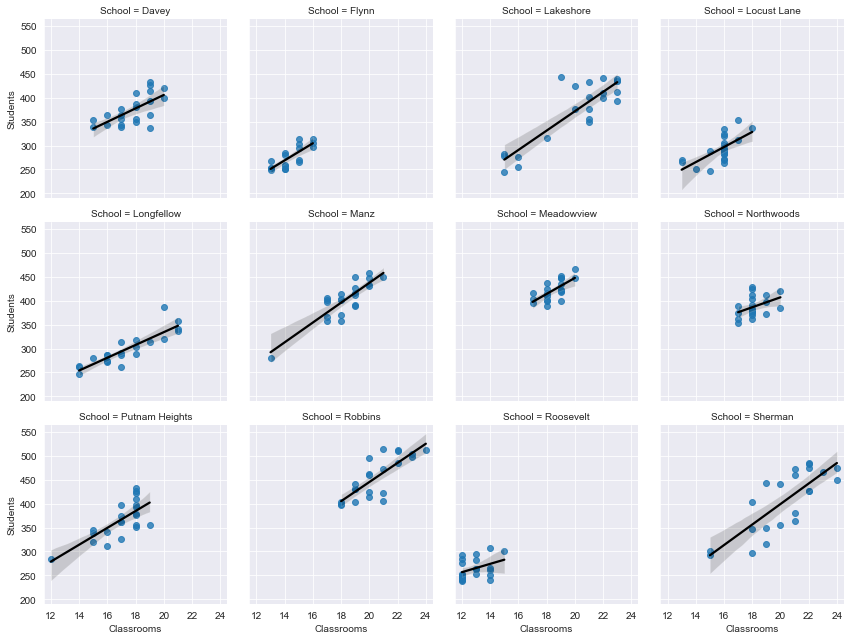

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

g = sns.lmplot(x="Classrooms", y="Students", col="School", col_wrap=4, data=df, height=3, line_kws={"color": "black"})
g.set(xlim=(11.5, 24.5))
g.set(xticks=range(12, 25, 2))
plt.show()

There is significant variation between the slops of each regression line. The lack of statistical significance between the variables at Northwoods and Roosevelt, is easily spotted in this graph.

### Linear Regression
Using [statsmodels](https://www.statsmodels.org/stable/index.html), I generated an OLS regression for each school.

The `p-value` (displayed as `P>|t|` in the results) and `R-squared` values were used for the analysis.

#### Sam Davey

In [3]:
from IPython.display import display, Markdown, Latex
import statsmodels.formula.api as smf

lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Davey"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     14.72
Date:                Wed, 23 Sep 2020   Prob (F-statistic):            0.00103
Time:                        21:56:03   Log-Likelihood:                -32.741
No. Observations:                  22   AIC:                             69.48
Df Residuals:                      20   BIC:                             71.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4962      2.949      2.203      0.0

#### Flynn

In [4]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Flynn"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     26.26
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           0.000102
Time:                        21:56:03   Log-Likelihood:                -16.937
No. Observations:                  18   AIC:                             37.87
Df Residuals:                      16   BIC:                             39.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8158      1.875      2.569      0.0

/Users/justin.hendrickson/.local/share/virtualenvs/ecasd-enrollment-lTXS9B87/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Lakeshore

In [5]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Lakeshore"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     64.58
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.09e-07
Time:                        21:56:03   Log-Likelihood:                -38.103
No. Observations:                  22   AIC:                             80.21
Df Residuals:                      20   BIC:                             82.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9799      1.771      3.376      0.0

#### Locust Lane

In [6]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Locust Lane"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     14.67
Date:                Wed, 23 Sep 2020   Prob (F-statistic):            0.00105
Time:                        21:56:03   Log-Likelihood:                -27.961
No. Observations:                  22   AIC:                             59.92
Df Residuals:                      20   BIC:                             62.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8959      2.054      3.844      0.0

#### Longfellow

In [7]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Longfellow"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     64.05
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.16e-07
Time:                        21:56:03   Log-Likelihood:                -32.800
No. Observations:                  22   AIC:                             69.60
Df Residuals:                      20   BIC:                             71.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3294      2.136      0.154      0.8

#### Manz

In [8]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Manz"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     59.96
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.92e-07
Time:                        21:56:03   Log-Likelihood:                -26.781
No. Observations:                  22   AIC:                             57.56
Df Residuals:                      20   BIC:                             59.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7717      1.887      1.998      0.0

#### Meadowview

In [9]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Meadowview"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           0.000400
Time:                        21:56:03   Log-Likelihood:                -20.275
No. Observations:                  22   AIC:                             44.55
Df Residuals:                      20   BIC:                             46.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5272      2.815      2.318      0.0

#### Northwoods

In [10]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Northwoods"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     4.074
Date:                Wed, 23 Sep 2020   Prob (F-statistic):             0.0572
Time:                        21:56:03   Log-Likelihood:                -24.660
No. Observations:                  22   AIC:                             53.32
Df Residuals:                      20   BIC:                             55.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8363      3.126      3.787      0.0

#### Putnam Heights

In [11]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Putnam Heights"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     22.26
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           0.000132
Time:                        21:56:03   Log-Likelihood:                -32.650
No. Observations:                  22   AIC:                             69.30
Df Residuals:                      20   BIC:                             71.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0200      2.330      2.584      0.0

#### Robbins

In [12]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Robbins"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     33.38
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.18e-05
Time:                        21:56:03   Log-Likelihood:                -31.718
No. Observations:                  22   AIC:                             67.44
Df Residuals:                      20   BIC:                             69.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2634      2.467      2.539      0.0

#### Roosevelt

In [13]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Roosevelt"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     3.498
Date:                Wed, 23 Sep 2020   Prob (F-statistic):             0.0762
Time:                        21:56:03   Log-Likelihood:                -27.988
No. Observations:                  22   AIC:                             59.98
Df Residuals:                      20   BIC:                             62.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2978      2.425      3.422      0.0

#### Sherman

In [14]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Sherman"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     34.70
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           9.21e-06
Time:                        21:56:03   Log-Likelihood:                -39.551
No. Observations:                  22   AIC:                             83.10
Df Residuals:                      20   BIC:                             85.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2952      2.059      4.028      0.0